<a href="https://colab.research.google.com/github/mitaliid/Digit-Classifier/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install torch torchvision matplotlib

In [14]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [15]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 10980567.37it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 4633226.00it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 14836956.95it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3801741.92it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [16]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [17]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [18]:
train_data.targets.size()

torch.Size([60000])

In [19]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [20]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size = 100,
                         shuffle = True,
                         num_workers = 1),
    'test' : DataLoader(test_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1),
}

In [14]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7de659336ce0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7de659336bc0>}

In [21]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader


class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training = self.training)
    x = self.fc2(x)

    return F.softmax(x)

In [22]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0}%)]\t {loss.item():.6f}')



def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim = 1, keepdim = True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)
  print(f'\n Test set: Averge loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')


In [23]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-21-daae86d532f9>:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0e+00%)]	 2.301445
Train Epoch: 1 [2000/60000 (3e+00%)]	 2.291764
Train Epoch: 1 [4000/60000 (7e+00%)]	 2.235420
Train Epoch: 1 [6000/60000 (1e+01%)]	 2.047650
Train Epoch: 1 [8000/60000 (1e+01%)]	 1.953828
Train Epoch: 1 [10000/60000 (2e+01%)]	 1.827724
Train Epoch: 1 [12000/60000 (2e+01%)]	 1.772790
Train Epoch: 1 [14000/60000 (2e+01%)]	 1.707783
Train Epoch: 1 [16000/60000 (3e+01%)]	 1.735098
Train Epoch: 1 [18000/60000 (3e+01%)]	 1.726111
Train Epoch: 1 [20000/60000 (3e+01%)]	 1.749770
Train Epoch: 1 [22000/60000 (4e+01%)]	 1.639606
Train Epoch: 1 [24000/60000 (4e+01%)]	 1.673066
Train Epoch: 1 [26000/60000 (4e+01%)]	 1.671836
Train Epoch: 1 [28000/60000 (5e+01%)]	 1.686828
Train Epoch: 1 [30000/60000 (5e+01%)]	 1.613318
Train Epoch: 1 [32000/60000 (5e+01%)]	 1.593116
Train Epoch: 1 [34000/60000 (6e+01%)]	 1.641677
Train Epoch: 1 [36000/60000 (6e+01%)]	 1.596206
Train Epoch: 1 [38000/60000 (6e+01%)]	 1.590430
Train Epoch: 1 [40000/60000 (7e+01%)]	 1.584481


In [24]:
device

device(type='cpu')

<ipython-input-21-daae86d532f9>:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 9


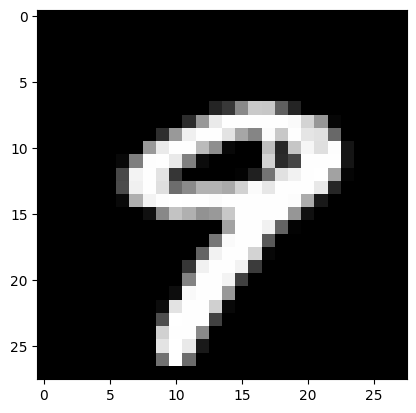

In [36]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[9]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim = 1, keepdim = True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap = 'gray')
plt.show()
